# <p style="text-align: center;">NOVA IMS</p>

# <p style="text-align: center;">Machine Learning and Data Science Project</p>

# Business Understanding

<p style="text-align: justify"> LaGoste Stores is a company that operates in the fashion, sports and luxury sectors. Their products offer consists in five categories: Sneakers, Rackets, T-Shirts, Watches and Hats, each one divided in Premium Brand and Mainstream Articles. All the products can be purchased in physical stores, in their website or ordered through their quaterly catalogs. Currently, they sell their products to more than one million consumers every year and they have around 300 000 registered customers</p>

# The Challenge
<p style="text-align: justify">In spite of having solid revenues and a healthy bottom line for the past five years, the company's profit growth perspectives for the next two years are not optimistic. In order to change those perspectives the company is outlining some strategic initiatives.</p>

# Objective
<p style="text-align: justify">One of the strategies being studied and that will play an important role in the profit growth is the efficiency of the marketing campaigns.</p>
<p style="text-align: justify">Therefore, based on the company's customer database we will have to use quantitative technics to identify relevant segments of clients and define a profile for each one.</p>
<p style="text-align: justify">The marketing department is planning a direct campaign aiming the sell of a new product, as this campaign has costs the Marketing department has already carried out pilot campaign where they contacted 2500 clients and took note if the client accepted (bought the new product) or not the campaign. 12,5% of the customers contacted has accepted the campaign which lead the company to a negative profit of around 3750€.</p>
<p style="text-align: justify">Our Job is to predict a model a predictive model for a dependent variable representing Customers that have higher potential of answering positively to the new product direct marketing campaign. .</p>
<p style="text-align: justify">To be able to build a good predictive model, we'll study several models and access which is the best one.</b></p>
<p style="text-align: justify"> In the end, we will calculate an approximation of the profit that the company will have after contacting only the customers that have the biggest potential to buy the new product, saving the costs of contacting customers that wouldn't buy it.</p>

The objective of the team is to build a predictive model that will produce the highest profit for the next direct marketing campaign of the company – the sixth campaign this year that is scheduled for next month. The campaign aims at selling a new product to the customer database (potential of 250,000 customers). T

## Import libraries

We will start by importing some of the libraries and modules that we will need to use in this file.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import RobustScaler

import warnings
warnings.filterwarnings('ignore')

C:\Users\pedro\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Import Dataset

<p style="text-align: justify">We will use the dataset we've treated in our first assignment so it is already pre-proccessed.</p>

In [2]:
dataset = pd.read_csv("marketing_dataset.csv", index_col="Custid")

In [3]:
dataset

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntSneakers,MntTShirts,MntRackets,MntWatches,...,Complain,DepVar,Age,TimeAsCustomer,TotalCampaigns,PremBrandFan,TotalMnt,TotalPurchases,HighEducation,MaritalStatusLabel
Custid,,,,,,,,,,,,,,,,,,,,,
70012576,2n Cycle,Single,0.652412,0.0,0.0,0.0,0.126253,0.521739,0.379586,0.432584,...,0,0,0.527273,1079,0.00,0,0.486694,0.526316,1,2
70034556,Basic,Together,0.402560,0.0,0.5,0.0,0.482298,0.096990,0.192128,0.050562,...,0,0,0.636364,1723,0.25,0,0.348906,0.526316,0,3
70021396,Graduation,Married,0.291219,1.0,0.0,0.0,0.013360,0.020067,0.008005,0.011236,...,0,0,0.381818,1308,0.00,0,0.015080,0.289474,1,1
70035464,Graduation,Married,0.342804,0.0,0.5,0.0,0.052104,0.000000,0.011341,0.000000,...,0,0,0.672727,1228,0.00,0,0.028977,0.315789,1,1
70008640,Master,Married,0.550433,0.0,0.0,0.0,0.224449,0.652174,0.411608,0.932584,...,0,0,0.400000,1170,0.00,0,0.408338,0.578947,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70011384,Graduation,Together,0.642138,0.0,0.0,1.0,0.680695,0.381271,0.596398,0.488764,...,0,0,0.890909,1305,0.50,0,0.709639,0.921053,1,3
70034628,Graduation,Married,0.492810,0.5,0.5,1.0,0.287241,0.000000,0.049366,0.022472,...,0,0,0.527273,1729,0.00,0,0.166765,0.578947,1,1
70024144,Graduation,Married,0.641588,0.0,0.0,1.0,0.490982,0.113712,0.735824,0.117978,...,0,0,0.254545,1600,0.00,0,0.645180,0.710526,1,1


## Split Data

In [4]:
# Get the independent variables (data) and the target (target)

# Remove categorical variables, since we already added in the first work its transformation into numerical groups
data = dataset.drop(["DepVar", "Education", "Marital_Status"], axis=1)
target = dataset["DepVar"]

In [5]:
# Data scaling
robust = RobustScaler().fit(data)
data = robust.transform(data)
data=pd.DataFrame(data)

In [6]:
#Split data into training and test 80/20 with shuffle and stratify
X_train_val, X_test, y_train_val, y_test = train_test_split(data, 
                                                    target, 
                                                    test_size=0.2, 
                                                    random_state=15, 
                                                    shuffle=True, 
                                                    stratify=target
                                                   )

In [7]:
print("X Train:",X_train_val.shape, "X Test:", X_test.shape, "Target Train:", y_train_val.shape, "Target Test:", y_test.shape)

X Train: (1995, 29) X Test: (499, 29) Target Train: (1995,) Target Test: (499,)


In [8]:
# split the dataset train into Train and Validation (75/25) with shuffle and stratify target
X_train, X_val, y_train, y_val = train_test_split(X_train_val,
                                                  y_train_val,
                                                  test_size = 0.25,
                                                  random_state = 15,
                                                  shuffle=True,
                                                  stratify=y_train_val
                                                )

In [9]:
print("X Train:",X_train.shape, "X Validation:", X_val.shape, "Target Train:", y_train.shape, "Target Validation:", y_val.shape)

X Train: (1496, 29) X Validation: (499, 29) Target Train: (1496,) Target Validation: (499,)


In [10]:
# check the proportion of data for each group
print('train:{}% | validation:{}% | test:{}%'.format(round(len(y_train)/len(target),2),
                                                     round(len(y_val)/len(target),2),
                                                     round(len(y_test)/len(target),2)
                                                    ))

train:0.6% | validation:0.2% | test:0.2%


## K-Fold

<p style="text-align: justify">We will use the K-Fold technique to validate the models, within the training data (training + validation) in order to arrive at the model with the best results</p>

In [11]:
# Declare Training functions for the various models

# Logistic Regression
def run_model_LR(X,y):
    model = LogisticRegression().fit(X,y)
    return model

# Decision Tree
def run_model_DT(X,y,max_depth):
    model = DecisionTreeClassifier(max_depth = max_depth).fit(X,y)
    return model

# Support Vector Machine
def run_model_SVM(X, y):
    model = SVC(gamma='auto', probability=True).fit(X, y)
    return model

# random forest
def run_model_RF(X, y):
    model = RandomForestClassifier(n_estimators=45).fit(X, y)
    return model



In [12]:
# function that returns the method score
def evaluate_model(X,y, model):
    return model.score(X,y)


In [13]:
# Functions to return the average score between training and validation for the various models 
# As parameters will be used in addition to the method, the dependent variable (target) and the independent variables

# Logistic Regression (LR)
def avg_score_LR(method,X,y):
    score_train = []
    score_test = []
    for train_index, test_index in method.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model = run_model_LR(X_train, y_train)
        value_train = evaluate_model(X_train, y_train, model)
        value_test = evaluate_model(X_test,y_test, model)
        score_train.append(value_train)
        score_test.append(value_test)
        
    print('Train:', np.mean(score_train))
    print('Validation:', np.mean(score_test))
    return model

#Decision Tree (DT)
def avg_score_DT(method,X,y, max_depth):
    score_train = []
    score_test = []
    for train_index, test_index in method.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model = run_model_DT(X_train, y_train, max_depth)
        value_train = evaluate_model(X_train, y_train, model)
        value_test = evaluate_model(X_test,y_test, model)
        score_train.append(value_train)
        score_test.append(value_test)

    print('Train:', np.mean(score_train))
    print('Validation:', np.mean(score_test))
    return model, np.mean(score_train), np.mean(score_test)


# Support Vector Machine (SVM)
def avg_score_SVM(method,X,y):
    score_train = []
    score_test = []
    for train_index, test_index in method.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model = run_model_SVM(X_train, y_train)
        value_train = evaluate_model(X_train, y_train, model)
        value_test = evaluate_model(X_test,y_test, model)
        score_train.append(value_train)
        score_test.append(value_test)
        
    print('Train:', np.mean(score_train))
    print('Validation:', np.mean(score_test))
    return model

#Random Forest (RF)
def avg_score_RF(method,X,y):
    score_train = []
    score_test = []
    for train_index, test_index in method.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model = run_model_RF(X_train, y_train)
        value_train = evaluate_model(X_train, y_train, model)
        value_test = evaluate_model(X_test,y_test, model)
        score_train.append(value_train)
        score_test.append(value_test)
        
    print('Train:', np.mean(score_train))
    print('Validation:', np.mean(score_test))
    return model



In [14]:
# function to show the results of the metrics for evaluation
def metrics(y_train, pred_train , y_val, pred_val):
    print('___________________________________________________________________________________________________________')
    print('                                                     TRAIN                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_train, pred_train))
    print(confusion_matrix(y_train, pred_train))


    print('___________________________________________________________________________________________________________')
    print('                                                VALIDATION                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_val, pred_val))
    print(confusion_matrix(y_val, pred_val))

### Evaluate Logistic Regression

In [15]:
#Define split number 
kf = KFold(n_splits=6)

#Ver qual o score obtido para Linear Regression
model = avg_score_LR(kf, data, target)

Train: 0.8967115893647816
Validation: 0.8945396972505405


__Nota__: Although this technique (KFold) can be efficient, we do not use it as is. We prefer to use the repeatedKFold method, which will allow us to repeat the KFold several times, where n splites are produced in each repetition

In [16]:
#K-Fold repeated
rkf = RepeatedKFold(n_splits=10, n_repeats=10)

# See which score is obtained when repeated

#Ver qual o score obtido para Logistic Regression
print('-------------- Logistic Regression -------------')
model_LR = avg_score_LR(rkf, X_train, y_train)
print('----------------------------------------------')


-------------- Logistic Regression -------------
Train: 0.9043673189333845
Validation: 0.8947230425055928
----------------------------------------------


__Obs__: Our Data is probably unbalanced, so we will use other more reliable metrics such as the F1-score, to better access the quality of the model.

#### Model Evaluation (classification)

In [17]:
# assign the predictions to y_pred, using the method predict()
y_pred = model_LR.predict(X_val)

<table border="1">
 <tr>
    <td><b>Confusion Matrix:</b><br>
[ [ TN  FP  ] <br>
    [ FN  TP ] ]</td>
    <td><b>$$accuracy$$</b><br>$$ \frac{TP + TN}{TP + FN + TN + FP}     $$</td>
    <td><b>$$precision$$</b><br>$$ \frac{TP}{TP + FP}     $$</td>
    <td><b>$$recall$$</b><br>$$ = \frac{TP}{TP + FN}     $$</td>
    <td><b>$$F1-score$$</b><br>$$ \frac{2 \times precision \times recall}{precision+recall}     $$</td>
 </tr>
</table>

In [18]:
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))
print("Accurancy Score:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred))
print("Recall:", recall_score(y_val, y_pred))
print("F1 score:", f1_score(y_val, y_pred))

Confusion Matrix:
[[422  12]
 [ 47  18]]
Accurancy Score: 0.8817635270541082
Precision: 0.6
Recall: 0.27692307692307694
F1 score: 0.37894736842105264


__Obs__: From the confusion matrix, we can see that our data is unbalanced for the negative, it confirms what we have been told about the rate of a customer accepting the campaign (12,5%).

####  Resume

In [19]:
# Logistic Regression Metrics
# compare train predict vs validation
labels_train = model_LR.predict(X_train)
labels_val = model_LR.predict(X_val)
metrics(y_train = y_train, pred_train = labels_train, y_val = y_val, pred_val = labels_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      1303
           1       0.70      0.44      0.54       193

    accuracy                           0.90      1496
   macro avg       0.81      0.70      0.74      1496
weighted avg       0.89      0.90      0.89      1496

[[1267   36]
 [ 109   84]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------------------------

__Conclusion__: we obtained with Logistic Regression a very good f1-score in the case of 0 (not buying) above 0.90 (for training and validation), but as for 1 (buying) it is far below expectations, slightly around 0.40 (for training and validation)

### Evaluate Models

In [20]:
# function to return the average score value for a given model
def avg_score(model):
    # apply kfold
    kf = KFold(n_splits=10)
    # create lists to store the results from the different models 
    score_train = []
    score_test = []
    timer = []
    for train_index, test_index in kf.split(data):
        # get the indexes of the observations assigned for each partition
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = target.iloc[train_index], target.iloc[test_index]
        # start counting time
        begin = time.perf_counter()
        # fit the model to the data
        model.fit(X_train, y_train)
        # finish counting time
        end = time.perf_counter()
        # check the mean accuracy for the train
        value_train = model.score(X_train, y_train)
        # check the mean accuracy for the test
        value_test = model.score(X_test,y_test)
        # append the accuracies, the time and the number of iterations in the corresponding list
        score_train.append(value_train)
        score_test.append(value_test)
        timer.append(end-begin)
    # calculate the average and the std for each measure (accuracy, time and number of iterations)
    avg_time = round(np.mean(timer),3)
    avg_train = round(np.mean(score_train),3)
    avg_test = round(np.mean(score_test),3)
    std_time = round(np.std(timer),2)
    std_train = round(np.std(score_train),2)
    std_test = round(np.std(score_test),2)
    
    return str(avg_time) + '+/-' + str(std_time), str(avg_train) + '+/-' + str(std_train),\
str(avg_test) + '+/-' + str(std_test)

In [21]:
# function to show on a dataframe the comparison of the models
def show_results(df, *args):
    """
    Receive an empty dataframe and the different models and call the function avg_score
    """
    count = 0
    # for each model passed as argument
    for arg in args:
        # obtain the results provided by avg_score
        time, avg_train, avg_test = avg_score(arg)
        # store the results in the right row
        df.iloc[count] = time, avg_train, avg_test
        count+=1
    return df

In [22]:
# declare K-Fold repeated
rkf = RepeatedKFold(n_splits=10, n_repeats=10)

#### Finding the best depth for Decision Trees

-------------- Decision Tree -----------------
------------ DT max depth= 1 ----------------
Train: 0.8709892436110845
Validation: 0.8709843400447427
------------ DT max depth= 2 ----------------
Train: 0.8842913480068526
Validation: 0.8741955257270692
------------ DT max depth= 3 ----------------
Train: 0.8921717845280527
Validation: 0.8760035794183445
------------ DT max depth= 4 ----------------
Train: 0.9055335063003913
Validation: 0.8698501118568233
------------ DT max depth= 5 ----------------
Train: 0.9249550539363794
Validation: 0.870565548098434
------------ DT max depth= 6 ----------------
Train: 0.9435529673006218
Validation: 0.8677673378076064
------------ DT max depth= 7 ----------------
Train: 0.9627152463622314
Validation: 0.8582192393736018
------------ DT max depth= 8 ----------------
Train: 0.976084871890757
Validation: 0.855089485458613
------------ DT max depth= 9 ----------------
Train: 0.9850861084728487
Validation: 0.8527364653243846
------------ DT max depth= 10

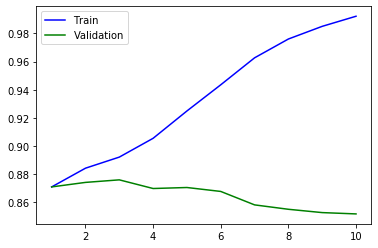

In [23]:
# Using Repeat KFold we will evaluate the best depth we should choose to stop at the decision tree (using the score)
# The technique chosen to avoid overfitting in TDs was the depth in the tree

x=[]
y_t=[]
y_v=[]

# validate the best depth to give to the Decision Tree 
print('-------------- Decision Tree -----------------')
for i in range(1,11):
    print('------------ DT max depth=', i, '----------------')
    max_depth = i
    model_DT, score_train, score_val = avg_score_DT(rkf, X_train, y_train, max_depth)
    x.append(i)
    y_t.append(score_train)
    y_v.append(score_val)
print('----------------------------------------------')

#plot results for better viewing
plt.plot(x, y_t, color='blue', label ='Train')
plt.plot(x, y_v, color='green', label = 'Validation')
plt.legend()

__Conclusion__: as it turns out, depth 2 is ideal for gaining the score in both training data and validation data (to reduce overfitting to the maximum)

In [24]:
#set max_depth
max_depth =2

__Obs__: Since we know that the target is an unbalanced variable, accurancy is not the best way to measure the quality of the model, so we will use other metrics.

#### Evaluate Metrics Decision Tree (DT)

In [25]:
# Compare training predict versus validation

print('___________________________________________________________________________________________________________')
print('__                                Comparative Gini usage (max depth = 2)                                 __')
model_DT = DecisionTreeClassifier(max_depth = max_depth).fit(X_train, y_train)
labels_train = model_DT.predict(X_train)
labels_val = model_DT.predict(X_val)
metrics(y_train = y_train, pred_train = labels_train, y_val = y_val, pred_val = labels_val)

___________________________________________________________________________________________________________
__                                Comparative Gini usage (max depth = 2)                                 __
___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1303
           1       0.59      0.41      0.48       193

    accuracy                           0.89      1496
   macro avg       0.75      0.68      0.71      1496
weighted avg       0.87      0.89      0.88      1496

[[1247   56]
 [ 114   79]]
__________________________________________________________________________________________________________

__Conclusion__: This model obtained slightly better results when evaluating the result of the validation compared to the Logistic Regression.

In [26]:
# Compare training and validation scores taking into account some parameter variations
dt_gini = DecisionTreeClassifier(max_depth = max_depth)

# change the criterion to Entropy
dt_entropy = DecisionTreeClassifier(criterion = 'entropy', max_depth = max_depth)

# see if the parameter class_weight = balanced brings better results
dt_balanced = DecisionTreeClassifier(class_weight = 'balanced', max_depth = max_depth)

In [27]:
df = pd.DataFrame(columns = ['Time','Train','Test'], index = ['Gini','Entropy', 'Gini Balanced'])
show_results(df,dt_gini, dt_entropy ,dt_balanced)

,Time,Train,Test
Gini,0.005+/-0.0,0.882+/-0.01,0.877+/-0.03
Entropy,0.006+/-0.0,0.881+/-0.0,0.877+/-0.03
Gini Balanced,0.005+/-0.0,0.59+/-0.01,0.586+/-0.02


__Conclusion__: Both Gini and Entropy have identical scores. We chose to use Gini as we had already validated it above. Balancing did not bring added value, quite the contrary.

#### Evaluate Metrics Support Vector Machine (SVM)

In [28]:
# Compare training predict versus validation

print('___________________________________________________________________________________________________________')
print('__                                          Comparative Scores                                           __')
model_SVM = avg_score_SVM(rkf, X_train, y_train)
labels_train = model_SVM.predict(X_train)
labels_val = model_SVM.predict(X_val)
metrics(y_train = y_train, pred_train = labels_train, y_val = y_val, pred_val = labels_val)

___________________________________________________________________________________________________________
__                                          Comparative Scores                                           __
Train: 0.894347871170429
Validation: 0.8781463087248322
___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      1.00      0.94      1303
           1       0.98      0.21      0.35       193

    accuracy                           0.90      1496
   macro avg       0.94      0.61      0.65      1496
weighted avg       0.91      0.90      0.87      1496

[[1302    1]
 [ 152   41]]
__________________________________________________

__Conclusion__: In this case the results were much worse, compared to the 2 previous models.

### Evaluate Metrics Random Forest (RF)

In [29]:
# Compare training and validation scores taking into account some parameter variations
dt_gini = RandomForestClassifier(n_estimators=45)

# change the criterion to Entropy
dt_entropy = RandomForestClassifier(criterion = 'entropy', n_estimators=45)

# see if the parameter class_weight = balanced brings better results
dt_balanced = RandomForestClassifier(class_weight = 'balanced', n_estimators=45)

In [30]:
df = pd.DataFrame(columns = ['Time','Train','Test'], index = ['Gini','Entropy', 'Gini Balanced'])
show_results(df,dt_gini, dt_entropy, dt_balanced)

,Time,Train,Test
Gini,0.143+/-0.01,1.0+/-0.0,0.894+/-0.03
Entropy,0.164+/-0.0,1.0+/-0.0,0.898+/-0.03
Gini Balanced,0.136+/-0.0,1.0+/-0.0,0.888+/-0.03


__Conclusion__: We chose to use Gini for the validation of the other metrics, as it presented the best result

In [31]:
#Compare training predict versus validation

print('___________________________________________________________________________________________________________')
print('__                                          Comparative Scores                                           __')
model_RF = avg_score_RF(rkf, X_train, y_train)
labels_train = model_RF.predict(X_train)
labels_val = model_RF.predict(X_val)
metrics(y_train = y_train, pred_train = labels_train, y_val = y_val, pred_val = labels_val)

___________________________________________________________________________________________________________
__                                          Comparative Scores                                           __
Train: 0.9997920589588222
Validation: 0.895254586129754
___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1303
           1       0.98      0.95      0.97       193

    accuracy                           0.99      1496
   macro avg       0.99      0.97      0.98      1496
weighted avg       0.99      0.99      0.99      1496

[[1300    3]
 [  10  183]]
__________________________________________________

__Conclusion__: F1 score of accepting the campaign has similar results with the LR and DT

#### Neural Network

In [32]:
# Defining the model
model_NN = MLPClassifier()

In [33]:
df = pd.DataFrame(columns = ['Time','Train','Test'], index = ['Standard'])
show_results(df,model_NN)

,Time,Train,Test
Standard,3.246+/-0.07,0.961+/-0.0,0.902+/-0.02


In [34]:
# Set some paramteres to train
parameter_space = {
    'hidden_layer_sizes': [(50,50,50),(100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['lbfgs', 'adam'],
    'learning_rate_init': list(np.linspace(0.00001,0.1,5)),
    'learning_rate': ['constant','adaptive']
}

In [35]:
clf = GridSearchCV(model_NN, parameter_space)

In [36]:
clf.fit(X_train, y_train)

GridSearchCV(estimator=MLPClassifier(),
             param_grid={'activation': ['tanh', 'relu'],
                         'hidden_layer_sizes': [(50, 50, 50), (100,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'learning_rate_init': [1e-05, 0.025007500000000002,
                                                0.05000500000000001, 0.0750025,
                                                0.1],
                         'solver': ['lbfgs', 'adam']})

In [37]:
# Best parameter set
print('------------------------------------------------------------------------------------------------------------------------')
print('Best parameters found:\n', clf.best_params_)
print('------------------------------------------------------------------------------------------------------------------------')

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std , params))

------------------------------------------------------------------------------------------------------------------------
Best parameters found:
 {'activation': 'tanh', 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.05000500000000001, 'solver': 'adam'}
------------------------------------------------------------------------------------------------------------------------
0.866 (+/-0.017) for {'activation': 'tanh', 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'learning_rate_init': 1e-05, 'solver': 'lbfgs'}
0.870 (+/-0.003) for {'activation': 'tanh', 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'learning_rate_init': 1e-05, 'solver': 'adam'}
0.878 (+/-0.016) for {'activation': 'tanh', 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'learning_rate_init': 0.025007500000000002, 'solver': 'lbfgs'}
0.888 (+/-0.011) for {'activation': 'tanh', 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant

In [38]:
clf.best_params_

{'activation': 'tanh',
 'hidden_layer_sizes': (100,),
 'learning_rate': 'adaptive',
 'learning_rate_init': 0.05000500000000001,
 'solver': 'adam'}

In [39]:
# Optimum model
model_NN_optimum = MLPClassifier(activation = 'tanh',
                              hidden_layer_sizes=(100,),
                              learning_rate = 'adaptive',
                              learning_rate_init=0.1,
                              solver='adam')

In [40]:
df = pd.DataFrame(columns = ['Time','Train','Test'], index = ['Standard', 'Optimum'])
show_results(df, model_NN, model_NN_optimum)

,Time,Train,Test
Standard,3.318+/-0.1,0.964+/-0.0,0.906+/-0.02
Optimum,1.021+/-0.29,0.985+/-0.02,0.881+/-0.03


In [41]:
# Compare training predict versus validation

print('___________________________________________________________________________________________________________')
print('__                                            Comparative NN                                             __')
model_NN_optimum=model_NN_optimum.fit(X_train,y_train)
labels_train = model_NN_optimum.predict(X_train)
labels_val = model_NN_optimum.predict(X_val)
metrics(y_train = y_train, pred_train = labels_train, y_val = y_val, pred_val = labels_val)

___________________________________________________________________________________________________________
__                                            Comparative NN                                             __
___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1303
           1       1.00      1.00      1.00       193

    accuracy                           1.00      1496
   macro avg       1.00      1.00      1.00      1496
weighted avg       1.00      1.00      1.00      1496

[[1303    0]
 [   0  193]]
__________________________________________________________________________________________________________

__Conclusion__: As we can see from the collect of the different F1-scores all the methods are better at predicting 0 than 1, it is because our dataset is negatively unbalanced.

<table border="1">
 <tr>
    <td><b>Model</b></td>
    <td><b>LR</b></td>
    <td><b>DT</b></td>
    <td><b>SVM</b></td>
    <td><b>RF</b></td>
    <td><b>NN</b></td>     
 </tr>
 <tr>
    <td>F1- score (train)</td>
    <td><b>0.93</b></td>
    <td><b>0.94</b></td>
    <td><b>0.94</b></td>
    <td><b>0.94</b></td>
    <td><b>0.94</b></td>     
 </tr>
 <tr>
    <td>F1- score (validation)</td>
    <td><b>0.40</b></td>
    <td><b>0.40</b></td>
    <td><b>0.17</b></td>
    <td><b>0.41</b></td>
    <td><b>0.50</b></td>     
 </tr>
</table>

The method with a better F1-score predicting the positive cases is Neural Network, with a F1-score of 0.5.

### ROC Curve and AUC Scores

This technique is higly used to evaluate the different model's performance in classification problems. It tell us how much a model is able to distinguish between classes while predicting. ROC is a probability curve where AUC is the area bellow this curve. The AUC is an estimate of the probability that a classifier will rank a randomly chosen positive instance higher than a randomly chosen negative instance. This way, we'll access which model performes better to be used by LaGoste Stores.

#### Prediction probabilities

In [42]:
# Baseline, 0, the worst case scenario
r_probs = [0 for _ in range(len(y_test))]

# probability of the predicted values
rf_probs = model_RF.predict_proba(X_test) 
dt_probs = model_DT.predict_proba(X_test)
lr_probs = model_LR.predict_proba(X_test)
svm_probs = model_SVM.predict_proba(X_test)
nn_probs = model_NN_optimum.predict_proba(X_test)

In [43]:
# Probabilities for the positive outcome is kept.

rf_probs = rf_probs[:, 1]
dt_probs = dt_probs[:, 1]
lr_probs = lr_probs[:, 1]
svm_probs = svm_probs[:, 1]
nn_probs = nn_probs[:, 1]

#### Computing AUROC and ROC curve values

In [44]:
# Calculating scores for every model

r_auc = roc_auc_score(y_test, r_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
dt_auc = roc_auc_score(y_test, dt_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
svm_auc = roc_auc_score(y_test, svm_probs)
nn_auc = roc_auc_score(y_test, nn_probs)

In [45]:
print('Random (chance) Prediction: AUROC = %.4f' % (r_auc))
print('Random Forest: AUROC = %.4f' % (rf_auc))
print('Decision Tree: AUROC = %.4f' % (dt_auc))
print('Logistic Regression: AUROC = %.4f' % (lr_auc))
print('Support Vector Machine: AUROC = %.4f' % (svm_auc))
print('Neural Network: AUROC = %.4f' % (nn_auc))

Random (chance) Prediction: AUROC = 0.5000
Random Forest: AUROC = 0.8744
Decision Tree: AUROC = 0.8080
Logistic Regression: AUROC = 0.8809
Support Vector Machine: AUROC = 0.9010
Neural Network: AUROC = 0.8993


In [46]:
# Calculating False Positive Rate and True Positive Rate to build the ROC Curve

r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
nn_fpr, nn_tpr, _ = roc_curve(y_test, nn_probs)

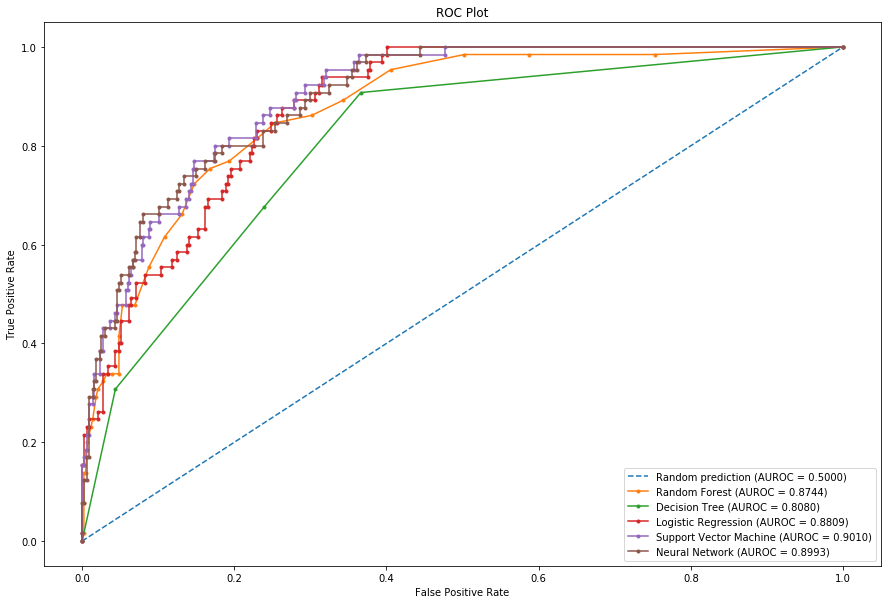

In [47]:
# Ploting the ROC Curve

figure = plt.figure(figsize=(15,10))
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.4f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.4f)' % rf_auc)
plt.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree (AUROC = %0.4f)' % dt_auc)
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression (AUROC = %0.4f)' % lr_auc)
plt.plot(svm_fpr, svm_tpr, marker='.', label='Support Vector Machine (AUROC = %0.4f)' % svm_auc)
plt.plot(nn_fpr, nn_tpr, marker='.', label='Neural Network (AUROC = %0.4f)' % nn_auc,)

plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

__Conclusion__: By analysing the graph above we verify that __Support Vector Machine has the best performance__ amongst the models with an AUROC 0.8969.

## Final Result

The F1-Score and the AUROC method have given us different results, by the F1-score the best metod is the Neural Network and according to the AUROC we should use the Support Vector Machine.

As our data is highly unbalanced, as confirmed in the confusion matrix, and the AUROC is more sensitive to this we will opt to use the Neural Network model to predict the customers we shall contact and who have higher probabilities of accepting the campaig.

In [48]:
new_data = pd.DataFrame(y_test)
new_data["Predict"] = model_NN_optimum.predict(X_test)

In [49]:
# Errors percentage
new_data.loc[new_data["DepVar"] != new_data["Predict"]].count()/len(new_data)

DepVar     0.11022
Predict    0.11022
dtype: float64

In [50]:
# Correct predictions percentage
new_data.loc[new_data["DepVar"] == new_data["Predict"]].count()/len(new_data)

DepVar     0.88978
Predict    0.88978
dtype: float64

## Predicted Profit

 

In the following section we are predicting the appoximate profit of the marketing campaign through the formula,

 

$$Profit = {Revenue - Cost}$$

 

$$ where, $$

 

$$Revenue = {CustomersOffer_1 * PotenyialCustomers * SaleValue * ModelF1Score}$$

 

$$Cost = {CustomersOffer_1 * PotentialCustomers * ContactCost}$$

 

Variables:
- PotentialCustomers - Total customers that are in the company's database and might be able to be contacted;
- CustomersOffer_1 - Proportion of customers that might accept the offer (number based in the 2500 customers sample);
- SaleValue - Value of the product the company is offering;
- ContactCost - Cost of each customer to be contacted in the marketing campaign;
- CorrectPredictions - the test accuracy of our best model.

In [51]:
def campaignProfit(PotencialCustomers, CustomersOffer_1, SaleValue, ContactCost, CorrectPredictions):
    Revenue = CustomersOffer_1 * PotencialCustomers * SaleValue * CorrectPredictions
    Cost = CustomersOffer_1 * PotencialCustomers * ContactCost
    Predicted_Profit = Revenue - Cost
    print("The approximate profit of the campaign using the Neural Networks model is %0.2f" % Predicted_Profit, "€.")

In [52]:
campaignProfit(247500, 0.125, 20, 4, 0.866)

The approximate profit of the campaign using the Neural Networks model is 412087.50 €.


# Conclusion

In this project we built several predictive models such as Random Forest, SVM, Decision Trees and Neural Networks, in order to identify the customers with the biggest potential to buy the new LAGoste’s product. Besides evaluating our models with ROC curves and AUC scores, we based our decision about the best model on F1-Scores since our data is imbalance. And the better model we obtained was the Neural Networks. With this predictive model, the company will be able to do the direct marketing campaign and obtain profits from it.